In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [21]:
import io
SuperStoreData = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [22]:
Initial_Shape = SuperStoreData.shape
Initial_Shape

(9994, 13)

In [23]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [24]:
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [25]:
SuperStoreData.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [26]:
SuperStoreData.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [28]:
SuperStoreData.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [29]:
#Checking if any columns having unique value ie only 1 value
unique = SuperStoreData.nunique()
unique = unique[unique.values ==1]
unique

Country    1
dtype: int64

In [56]:
#dropping postal code columns
data = SuperStoreData.drop(['Postal Code'],axis = 1)

In [30]:
SuperStoreData.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [31]:
#Deleting Identicle rows to reduce noise from the data
SuperStoreData.drop_duplicates(keep= 'first',inplace=True) 

In [32]:
#Final Shape of the dataframe
Final_Shape = SuperStoreData.shape
Final_Shape

(9977, 13)

In [33]:
# Initial number of rows vs final
Initial_Shape[0]- Final_Shape[0]

17

In [34]:
Sales_and_Profits = SuperStoreData.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

Sales     2296195.59
Profit     286241.42
dtype: float64

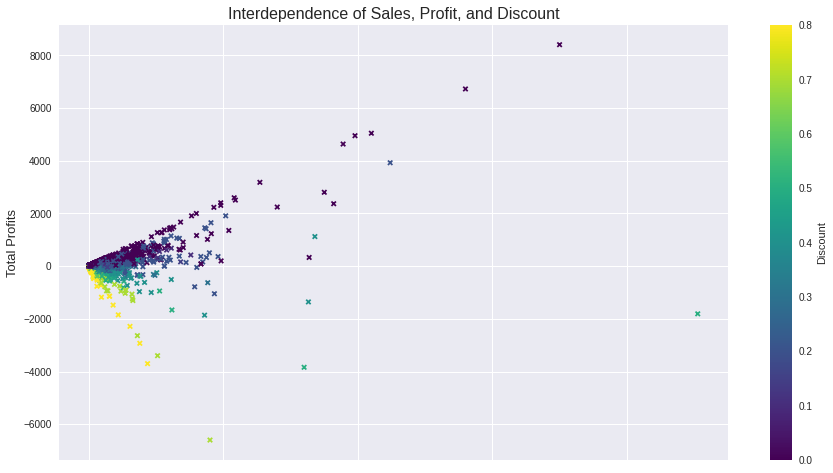

In [38]:
plt.style.use('seaborn')
SuperStoreData.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

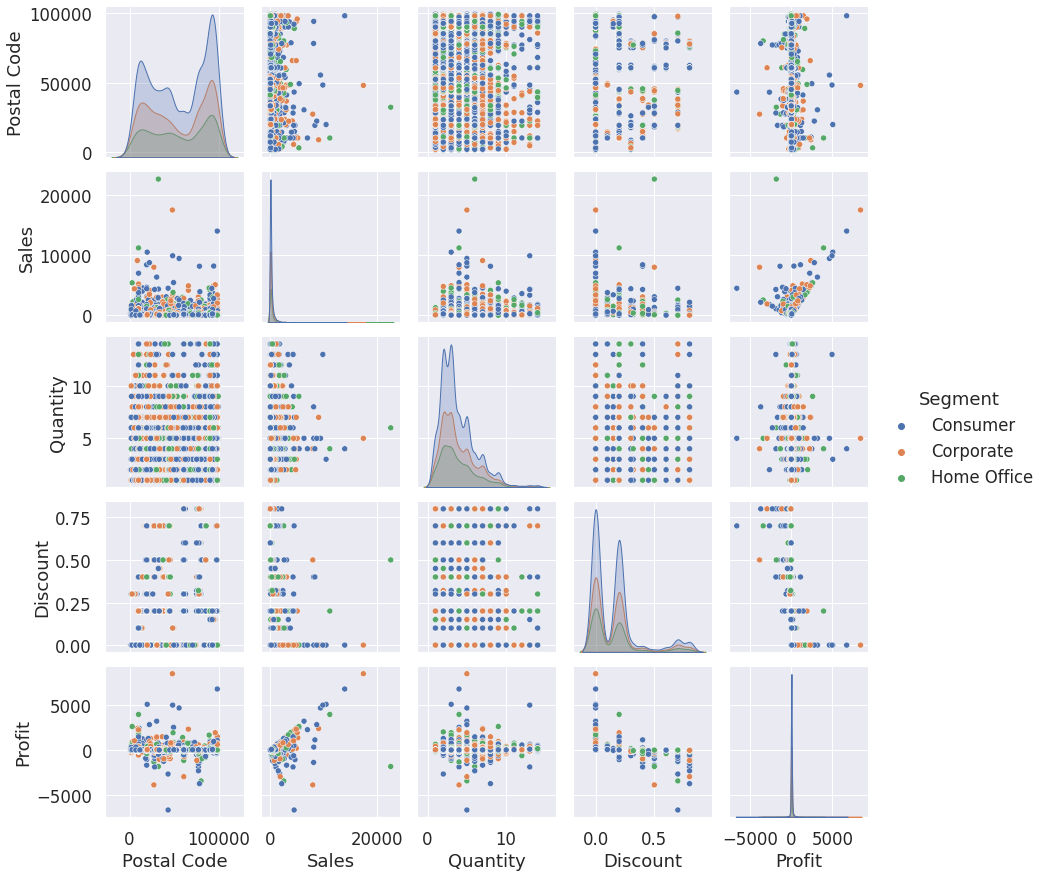

In [57]:
#plotting pair plot
sns.pairplot(SuperStoreData,hue = 'Segment')

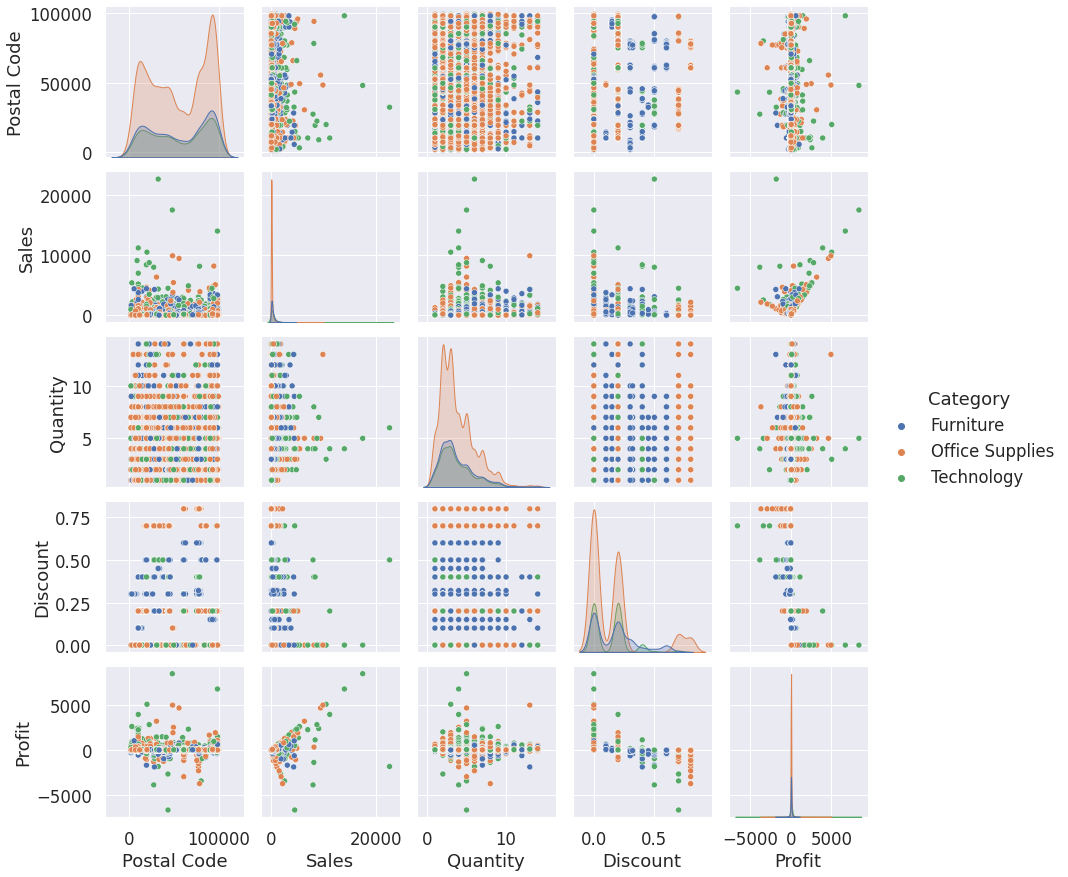

In [58]:
#plotting pair plot
sns.pairplot(SuperStoreData,hue = 'Category')

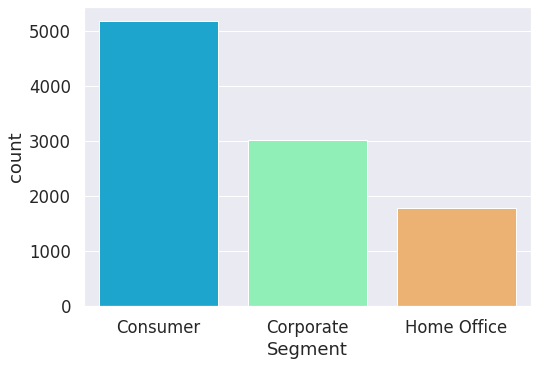

In [61]:
sns.countplot(x = 'Segment',data = SuperStoreData, palette = 'rainbow')


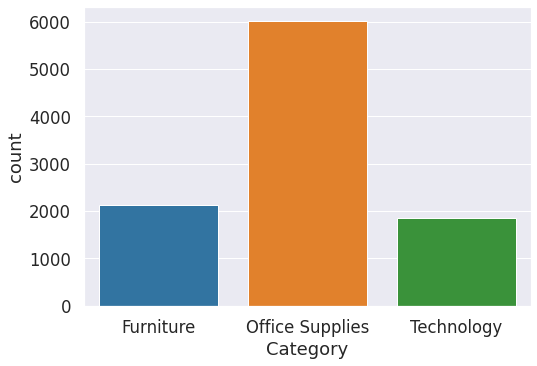

In [60]:
sns.countplot(x='Category',data=SuperStoreData,palette='tab10')

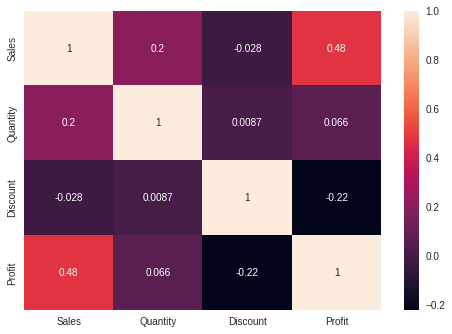

In [40]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

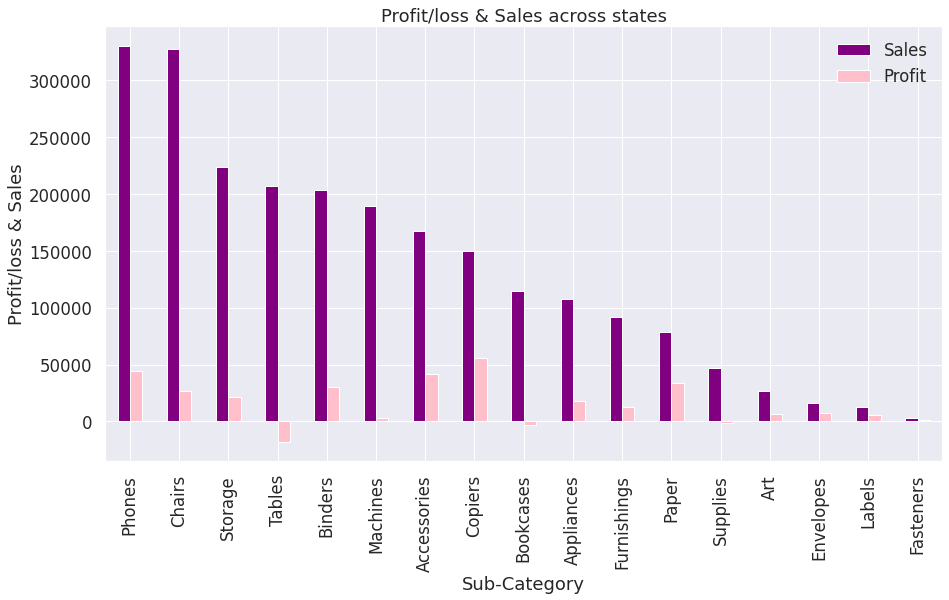

In [47]:
ps = SuperStoreData.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['purple','pink'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

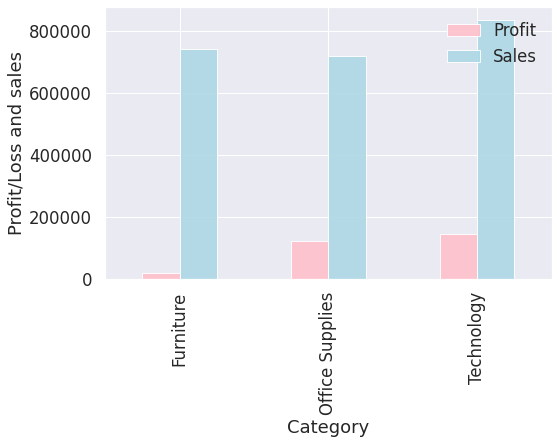

In [48]:
SuperStoreData.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['pink','lightblue'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

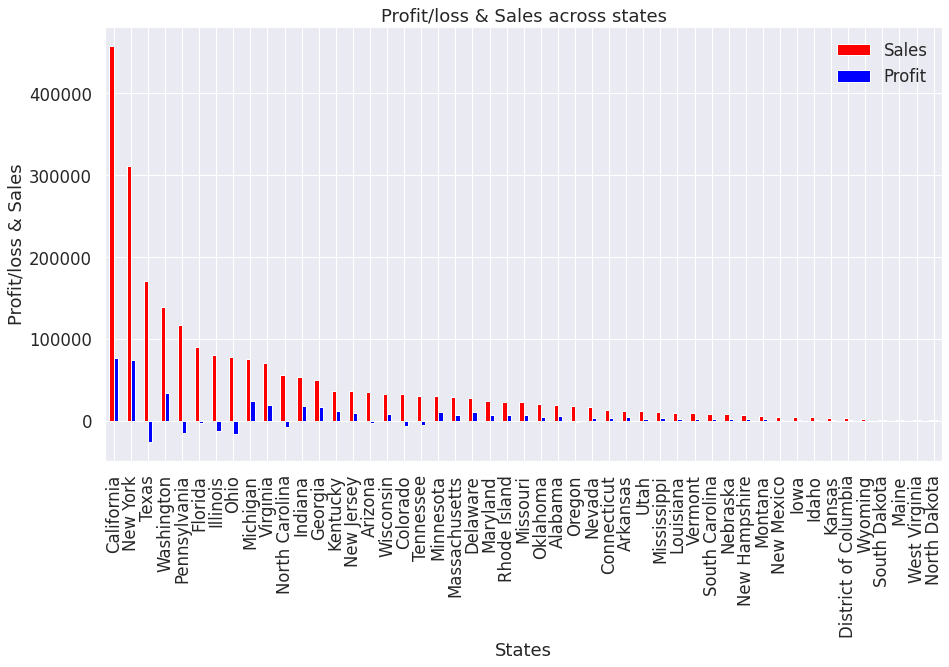

In [49]:
ps = SuperStoreData.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','blue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

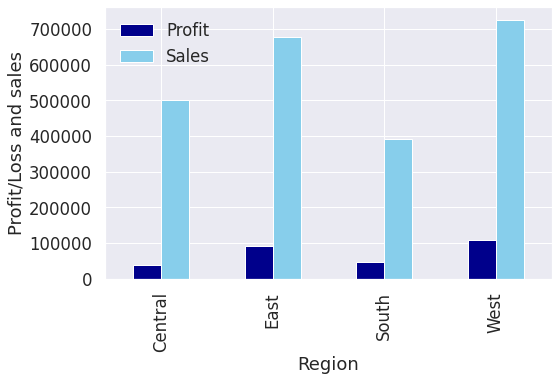

In [50]:
SuperStoreData.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['darkblue','skyblue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

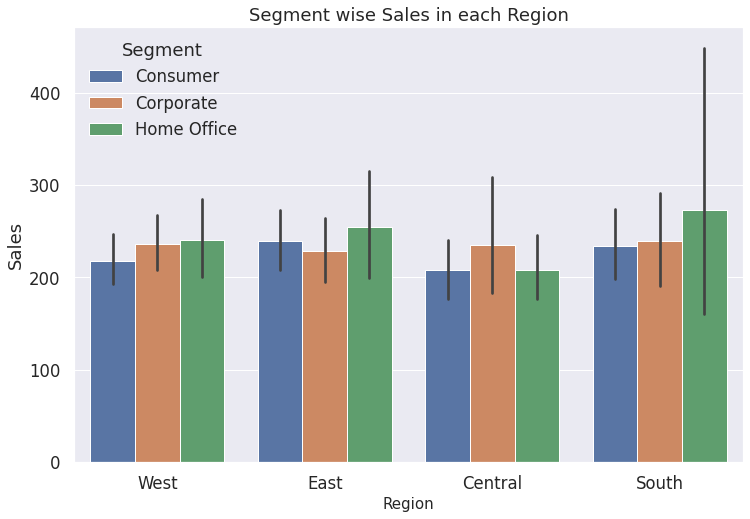

In [51]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=SuperStoreData,hue='Segment',order=SuperStoreData['Region'].value_counts().index,palette='deep')
plt.xlabel('Region',fontsize=15)
plt.show()

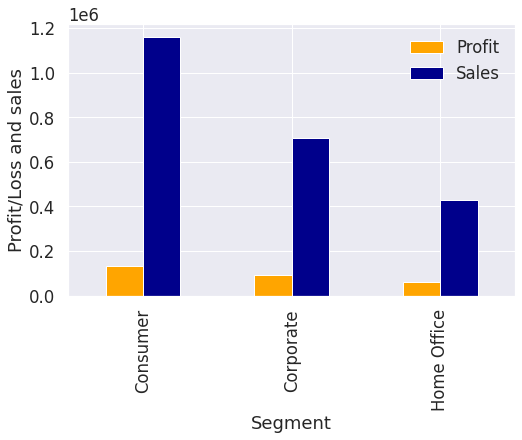

In [52]:
SuperStoreData.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['orange','darkblue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

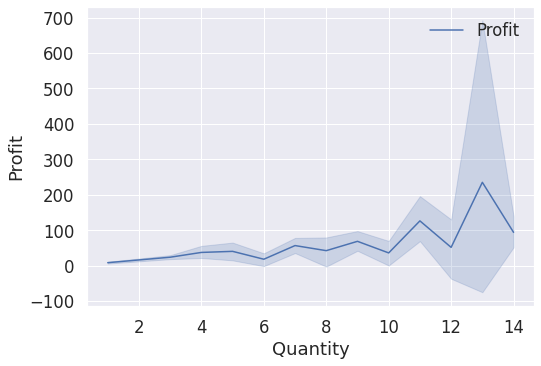

In [53]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=SuperStoreData)
plt.legend()
plt.show()

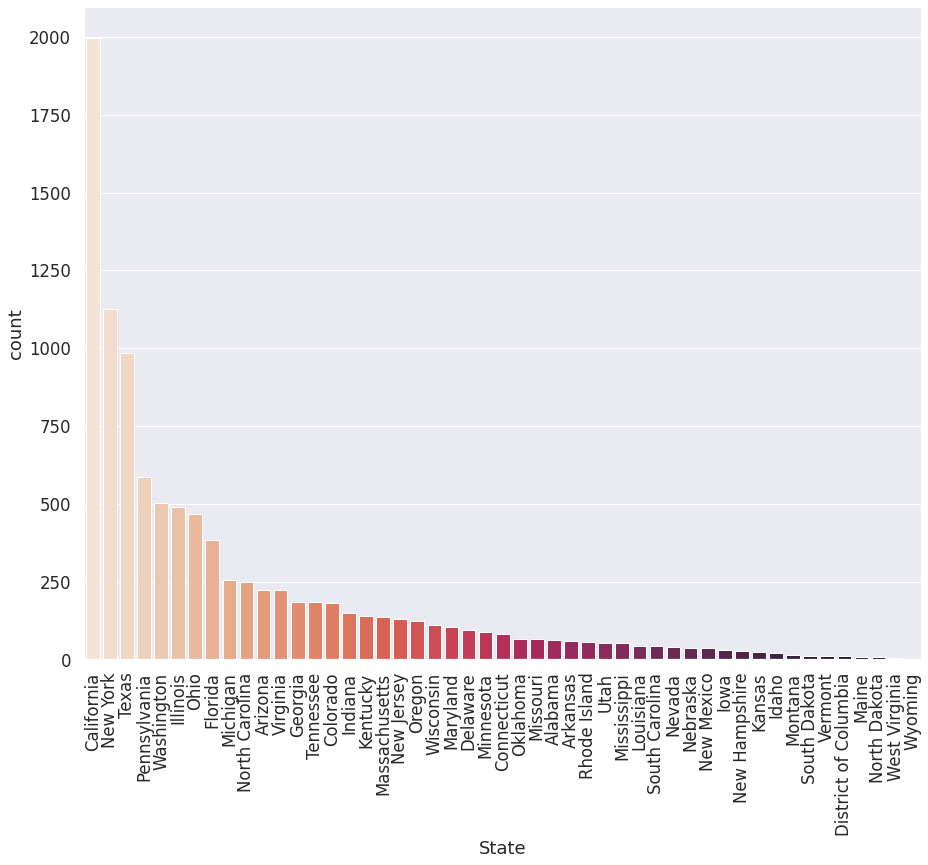

In [54]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=SuperStoreData,palette='rocket_r',order=SuperStoreData['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()